# Exercise 1: fitting supernova light curves  
Download the file “sn00fa_ubvri.snphot.dat” from the course web site. It is a text table containing UBVRI light curve data (magnitude vs. time) for the Type Ia supernova SN2000fa from Jha et al. (2006).  

1. Read in the table using your method of choice (e.g. `numpy.genfromtxt` or `astropy.io.ascii.read`). For this exercise we want the columns HJD, R (R magnitude) and Rerr (its uncertainty).


In [64]:
## Code Here
import numpy as np
path = "sn00fa.ubvri.snphot.dat"
data = np.genfromtxt(path) #trying the newer method
data
HJD = data[:,0]
R = data[:,7]
Rerr = data[:,8]
HJD,R,Rerr
# correct vlas now

(array([2451881.91, 2451898.83, 2451901.83, 2451906.82, 2451907.74,
        2451929.83, 2451933.83, 2451953.73, 2451959.61, 2451963.76,
        2451994.7 , 2452022.66]),
 array([16.889, 15.993, 16.155, 16.531, 16.56 , 17.246, 17.472, 18.167,
        18.372, 18.537, 19.478, 20.422]),
 array([0.016, 0.01 , 0.011, 0.012, 0.01 , 0.019, 0.021, 0.03 , 0.043,
        0.027, 0.116, 0.227]))

2. Select Julian dates (“HJD”) between 2451900 and 2451990.


In [65]:
## Code Here
dates = (HJD >= 2451900) & (HJD <= 2451990)
# dates #so this creates a mask instead of selecting those values
HJD_dates = HJD[dates]
# same with other 2 id assume
R_dates = R[dates]
R_err_dates = Rerr[dates]
HJD_dates,R_dates,R_err_dates #these dates are now correct

(array([2451901.83, 2451906.82, 2451907.74, 2451929.83, 2451933.83,
        2451953.73, 2451959.61, 2451963.76]),
 array([16.155, 16.531, 16.56 , 17.246, 17.472, 18.167, 18.372, 18.537]),
 array([0.011, 0.012, 0.01 , 0.019, 0.021, 0.03 , 0.043, 0.027]))

3. Using `scipy.stats.linregress`, fit a line to the R magnitude as a function of Julian date. Hint: the fitted intercepts will be much more reliable & numerically stable if you subtract the mean date before fitting.


In [83]:
## Code Here
from scipy.stats import linregress
# finding the mean
HJD_mean = np.mean(HJD_dates)
HJD_center = HJD_dates - HJD_mean
print(linregress(HJD_center,R_dates))
slope,intercept,rvalue,pvalue ,stderr = linregress(HJD_center,R_dates)



LinregressResult(slope=0.036480123756479674, intercept=17.37999999999363, rvalue=0.9975892558863514, pvalue=3.496292773978565e-08, stderr=0.001035994784186247, intercept_stderr=0.024251750546809125)


4. Plot the R-band flux versus time as points and the fit line with a solid line. Report the slope and its uncertainty (with units!).


0.036480123756479674 THIS IS SLOPE VALUE


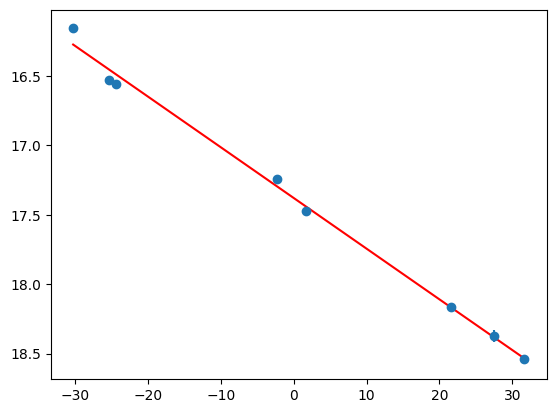

In [85]:
## Code Here
import matplotlib.pyplot as plt
plt.figure()
plt.errorbar(HJD_center, R_dates, yerr=R_err_dates, fmt='o') #huge error no? #nvm
# line of best fit here
print(slope,"THIS IS SLOPE VALUE")
line = (slope * HJD_center) + intercept
plt.gca().invert_yaxis()
plt.plot(HJD_center, line, 'r-')



5. Illustrate the uncertainty in the fit parameters as follows: draw 500 random values for the slope and intercept of the line. These values should be drawn from normal (Gaussian) distributions with means and standard deviations given by the fit parameters and their uncertainties. Construct 500 new lines from these samples and plot them on your figure.


Text(0.5, 1.0, 'UNCERTAINITY WITH 500 lines')

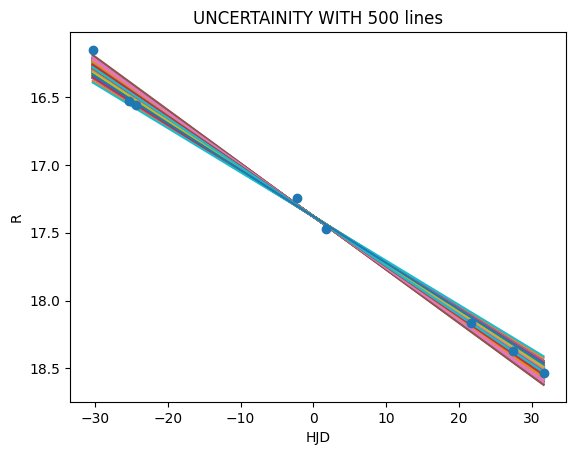

In [86]:
## Code Here
# 500 points here 
plt.errorbar(HJD_center, R_dates, yerr=R_err_dates, fmt='o')
plt.plot(HJD_center, line, 'r-')
line = np.random.normal(slope,stderr,500)
intercepts = np.random.normal(intercept,stderr,500)
# print(line) #just checking if no of points are correct
for i in range(len(line)):
    random_line = (line[i] * HJD_center) + intercepts[i]
    plt.plot(HJD_center,random_line)
plt.gca().invert_yaxis()
plt.xlabel("HJD")
plt.ylabel("R")
plt.title("UNCERTAINITY WITH 500 lines")

# Exercise 2: galaxy cluster X-ray surface brightness  
Download the file “abell1995_laroque2006.dat” from the course web site. This file contains the X-ray surface brightness profile of the cluster Abell 1995 as derived from Chandra X-ray observations in LaRoque et al. 2006, 652, 917.  

1. Read the radius, surface brightness, and surface brightness error from this file using your favorite text file reader.  




In [91]:
## Code Here
path2 = "abell1995_laroque2006.dat"
data2 = np.genfromtxt(path2)

radius = data2[:,0]
surf_b = data2[:,1]
surf_berr = data2[:,2]
radius,surf_b,surf_berr


(array([ 11.75466,  35.35281,  59.21263,  82.9195 , 106.2206 , 130.6875 ,
        154.6046 , 179.2029 , 201.7544 , 224.8372 , 248.0397 , 271.0236 ,
        296.0816 , 320.277  , 343.0121 , 367.2401 , 389.388  , 412.93   ,
        437.9983 , 459.784  , 482.9713 , 506.8985 , 526.9555 , 547.394  ,
        575.1077 , 598.8486 ]),
 array([4.790571e-04, 4.226571e-04, 3.906171e-04, 3.311068e-04,
        2.965275e-04, 2.279787e-04, 1.955229e-04, 1.471198e-04,
        1.289897e-04, 1.059312e-04, 8.328302e-05, 7.067796e-05,
        5.741886e-05, 4.716120e-05, 3.831743e-05, 2.884251e-05,
        2.292907e-05, 1.883465e-05, 1.633898e-05, 1.270926e-05,
        1.151768e-05, 8.576367e-06, 6.969091e-06, 4.755772e-06,
        4.502178e-06, 5.360049e-06]),
 array([3.24159e-05, 1.88576e-05, 8.61900e-06, 1.10190e-05, 6.54290e-06,
        5.03030e-06, 6.50690e-06, 3.24620e-06, 2.84610e-06, 3.52530e-06,
        2.76755e-06, 2.34868e-06, 1.90807e-06, 2.10418e-06, 1.70959e-06,
        1.28686e-06, 1.28583e-0

2. Fit the “isothermal beta model” profile to these data:

$$
S_X(r) = S_{X0} \left[1 + \left(\frac{r}{r_c}\right)^2\right]^{(1-6)\beta/2}
$$

Here $S_{X0}$, $r_c$, and $\beta$ are the fitting parameters. Report your best-fit values and the error in each parameter. How do your results compare to LaRoque et al.? ($r_c \approx 235$ kpc, $\beta \approx 0.921$) You need starting guesses; try $S_{X0} = 10^{-3}$ cts/s/arcmin$^2$, $r_c = 20$ kpc, and $\beta = 0.5$.



In [92]:
# def curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False,
#               check_finite=None, bounds=(-np.inf, np.inf), method=None,
#               jac=None, *, full_output=False, nan_policy=None,
#               **kwargs):
# just copying function parameters this unfction allows plotting of a non linear model which is defined by the function above

In [96]:
## Code Here
from scipy.optimize import curve_fit
def f_x(r,S_X0,r_c,beta):
    return S_X0 * (1 + (r/r_c) **2) ** (-3 * beta + 0.5)

guess = [10**-3,20,0.5]
print(curve_fit(f_x,radius,surf_b,sigma=surf_berr,p0=guess,absolute_sigma=True))
popt,pcov = curve_fit(f_x,radius,surf_b,sigma=surf_berr,p0=guess,absolute_sigma=True)
S_X0_best_fit, r_c_best_fit, beta_best_fit = popt
S_X0_err, r_c_err, beta_err = np.sqrt(np.diag(pcov))
S_X0_best_fit, r_c_best_fit, beta_best_fit, S_X0_err, r_c_err, beta_err
# very close

(array([4.28621965e-04, 2.46204845e+02, 9.43268875e-01]), array([[ 5.40009054e-11, -4.06311864e-05, -1.08956199e-07],
       [-4.06311864e-05,  5.33667344e+01,  1.70172691e-01],
       [-1.08956199e-07,  1.70172691e-01,  5.73747840e-04]]))


(0.00042862196530351606,
 246.20484501391658,
 0.9432688752762975,
 7.348530833231477e-06,
 7.305253887593174,
 0.02395303405372291)

3. Plot the data and the best-fit curve. Illustrate the fit uncertainties with 500 additional curves drawn from the fit parameters, using the same techniques as for Exercise 1.


Sx0 Value Best fit 0.00042862196530351606
rc best fit value 246.20484501391658 
beta best fit 0.9432688752762975


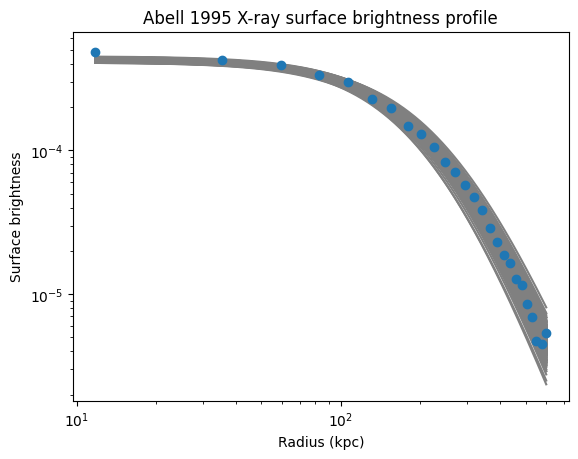

In [108]:
## Code Here
plt.figure()
plt.errorbar(radius,surf_b,yerr=surf_berr,fmt='o')
# linspace returns the intervak
rad = np.linspace(radius.min(),radius.max(),500)
curve = f_x(rad,S_X0_best_fit,r_c_best_fit,beta_best_fit)
plt.loglog(rad, curve, '--')
for i in range(len(rad)):
    # gets sample from normal distribution
    sampled_S_X0, sampled_r_c, sampled_beta = np.random.normal(S_X0_best_fit, S_X0_err), np.random.normal(r_c_best_fit, r_c_err), np.random.normal(beta_best_fit, beta_err)
    curve = f_x(rad,sampled_S_X0,sampled_r_c,sampled_beta)
    plt.plot(rad,curve,'gray')
plt.xlabel("Radius (kpc)")
plt.ylabel("Surface brightness")
plt.title("Abell 1995 X-ray surface brightness profile")
print("Sx0 Value Best fit",S_X0_best_fit)
print(f"rc best fit value {r_c_best_fit} \nbeta best fit {beta_best_fit}")

In [1]:
import scipy.optimize as opt


def f(x):
    return x**3 - x - 1

def fprime(x):
    return 3 * x**2 - 1

root = opt.newton(f, x0=1, fprime=fprime)

In [1]:
import nunpy as np
# def req


ModuleNotFoundError: No module named 'nunpy'